In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import PCA

In [5]:
precios_sp500 = pd.read_csv('../data/preciosSP500.csv', index_col= 0, parse_dates=True)

retornos = np.log(precios_sp500).diff().dropna()

ret_sp500 = retornos.iloc[:, :-1]
ret_index = retornos[['SPX']]

train_end = '2010-01-01'

ret_sp500_train = ret_sp500.loc[:train_end]
ret_index_train = ret_index.loc[:train_end]

ret_sp500_test = ret_sp500.loc[train_end:]
ret_index_test = ret_index.loc[train_end:]



In [47]:
ret_index

,SPX
2003-01-03,-0.000484
2003-01-06,0.022226
2003-01-07,-0.006566
2003-01-08,-0.014186
2003-01-09,0.019211
...,...
2013-12-16,0.006300
2013-12-17,-0.003106
2013-12-18,0.016511
2013-12-19,-0.000580


In [6]:
ret_sp500_norm_train = (ret_sp500_train - ret_sp500_train.mean())/ret_sp500_train.std()
ret_index_norm_train = (ret_index_train - ret_index_train.mean())/ret_index_train.std()

ret_sp500_norm_test = (ret_sp500_test - ret_sp500_train.mean())/ret_sp500_train.std()
ret_index_norm_test = (ret_index_test - ret_index_train.mean())/ret_index_train.std()

In [7]:
pca = PCA()

pca.fit(ret_sp500_norm_train)

autovectores = pca.components_
autovalores = pca.explained_variance_ratio_

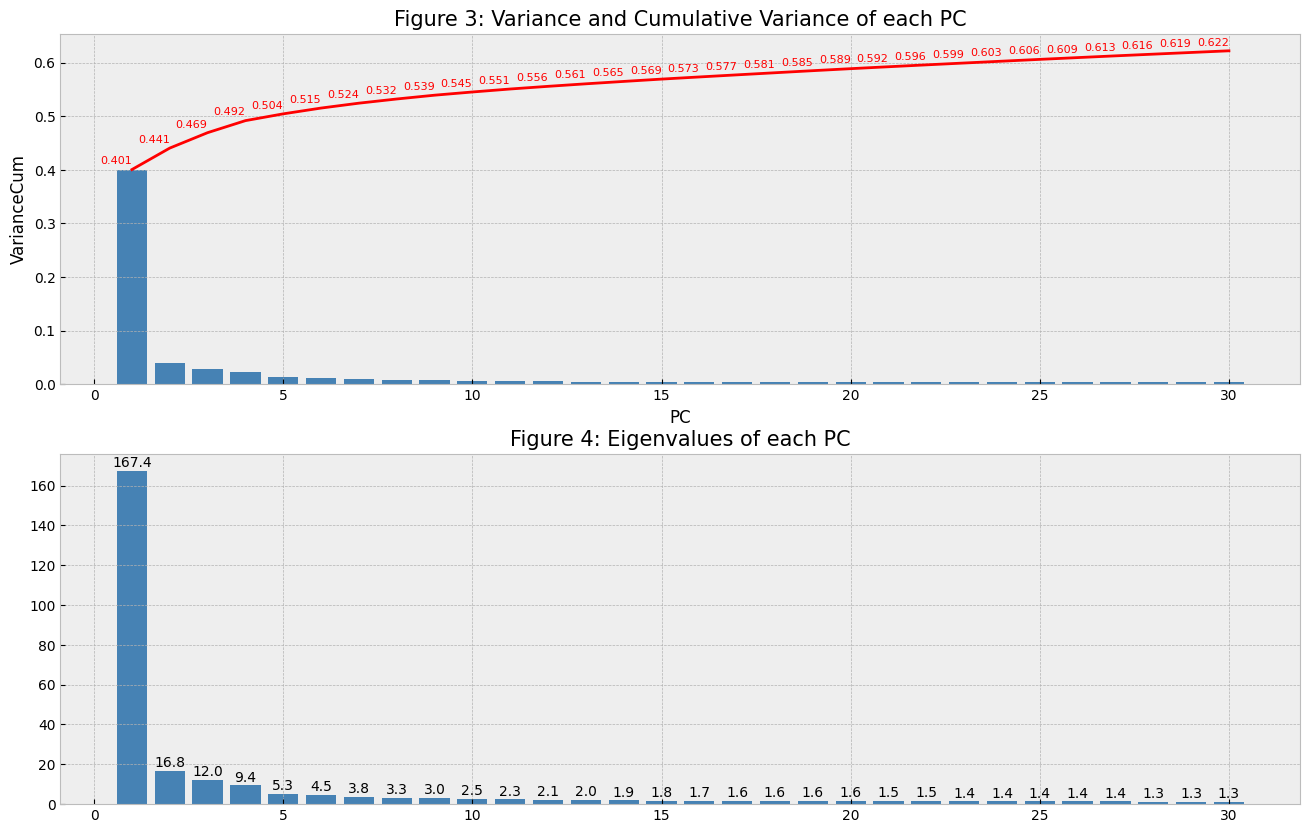

In [8]:
# pca = PCA()

# pca.fit(ret_sp500_norm_train)

summary30 = pd.DataFrame({'Variance' : pca.explained_variance_ratio_[0:30],
                          'VarianceCum' : pca.explained_variance_ratio_[0:30].cumsum(),
                          'Eigenvalue' : pca.explained_variance_[0:30],
                          'PC' : np.arange(1, len(pca.explained_variance_ratio_[0:30])+1)})

plt.style.use('bmh')
plt.figure(num = 3, figsize=(16,10))

plt.subplot(211)
plt.bar(data = summary30,
         height = 'Variance', x = 'PC', color="steelblue")
sns.lineplot(data = summary30,
         y = 'VarianceCum', x = 'PC', color="red")
for i, v in enumerate(round(summary30.VarianceCum,3)):
    plt.text(summary30.PC.tolist()[i], v+0.01, str(v), ha='right', 
             fontsize=8, color = 'red')
plt.title('Figure 3: Variance and Cumulative Variance of each PC', size=15)

plt.subplot(212)
plt.figure(num = 3, figsize=(16,10))
plt.bar(data = summary30,
         height = 'Eigenvalue', x = 'PC', color="steelblue")
for i, v in enumerate(round(summary30.Eigenvalue,1)):
    plt.text(summary30.PC.tolist()[i], v+2, str(v), ha='center', 
             fontsize=10, color = 'black')
plt.title('Figure 4: Eigenvalues of each PC', size=15)
plt.show()



In [9]:
#pesos_primer = pca.components_[0]/np.sum(pca.components_[0])

pesos_primer = autovectores[0]/np.sum(autovectores[0])

ret_cartera_train = pesos_primer @ ret_sp500_norm_train.T

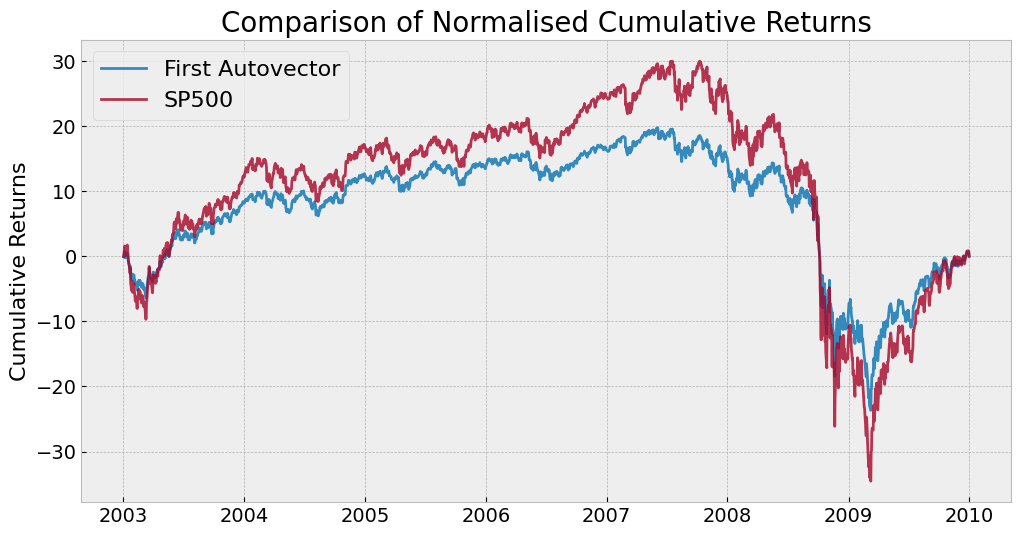

In [10]:
plt.style.use('bmh')  # Usando un estilo limpio y profesional

fig, ax = plt.subplots(figsize=(12, 6))  # Tamaño adecuado para inclusión en documentos

# Gráfico de la suma acumulada de retornos de la cartera
ax.plot(ret_cartera_train.cumsum(), label='First Autovector', linewidth=2)

# Gráfico de la suma acumulada de ret del índice normalizado
ax.plot(ret_index_norm_train.cumsum(), label='SP500', linewidth=2, alpha=0.8)

ax.set_title('Comparison of Normalised Cumulative Returns', fontsize=20)  # Título descriptivo
#ax.set_xlabel('Tiempo', fontsize=12)  # Etiqueta para el eje X
ax.set_ylabel('Cumulative Returns', fontsize=16)  # Etiqueta para el eje Y
ax.legend(fontsize=16)  # Leyenda con tamaño adecuado

ax.tick_params(labelsize=14)  # Adjust font size for tick labels

plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/retornos_acumulados.pdf', format='pdf', dpi=300)


plt.show()

In [11]:
print(f' La varianza del portfolio del primer autovector es {ret_cartera_train.var():.3f}')

 La varianza del portfolio del primer autovector es 0.409


In [12]:
print(f' El valor del primer autovalor es {pca.explained_variance_ratio_[0]:.3f}')

 El valor del primer autovalor es 0.401


In [13]:
pca_test = PCA()

pca_test.fit(ret_sp500_norm_test)

autovectores_test = pca_test.components_
autovalores_test = pca_test.explained_variance_ratio_


pesos_primer_test = autovectores_test[0]/np.sum(autovectores_test[0])

ret_cartera_test = pesos_primer_test @ ret_sp500_norm_test.T

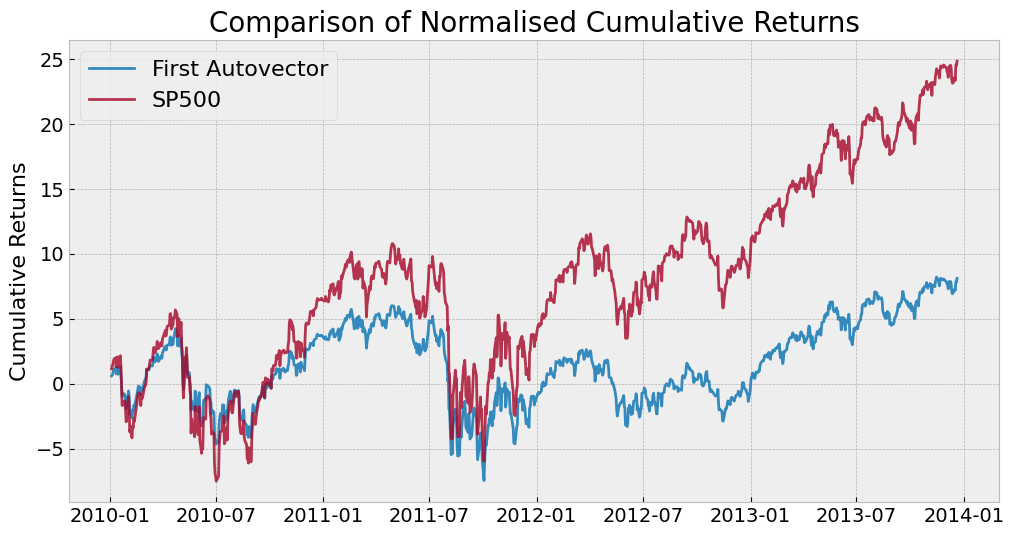

In [14]:
plt.style.use('bmh')  # Usando un estilo limpio y profesional

fig, ax = plt.subplots(figsize=(12, 6))  # Tamaño adecuado para inclusión en documentos

# Gráfico de la suma acumulada de retornos de la cartera
ax.plot(ret_cartera_test.cumsum(), label='First Autovector', linewidth=2)

# Gráfico de la suma acumulada de ret del índice normalizado
ax.plot(ret_index_norm_test.cumsum(), label='SP500', linewidth=2, alpha=0.8)

ax.set_title('Comparison of Normalised Cumulative Returns', fontsize=20)  # Título descriptivo
#ax.set_xlabel('Tiempo', fontsize=12)  # Etiqueta para el eje X
ax.set_ylabel('Cumulative Returns', fontsize=16)  # Etiqueta para el eje Y
ax.legend(fontsize=16)  # Leyenda con tamaño adecuado

ax.tick_params(labelsize=14)  # Adjust font size for tick labels

plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/retornos_acumulados_test.pdf', format='pdf', dpi=300)


plt.show()

In [15]:
# Obtén los nombres de los tickers del DataFrame original
tickers = ret_sp500_norm_train.columns

# Crea un DataFrame para visualizar los tickers y sus respectivos pesos en el primer componente principal
pesos_primer_df = pd.DataFrame(pesos_primer, index=tickers, columns=['Peso'])

# Calcula las varianzas de los retornos de los tickers
varianzas = ret_sp500_train.var()
# Crea un DataFrame a partir de las varianzas
varianzas_df = pd.DataFrame(varianzas, columns=['Varianza'])


In [16]:
def calc_regresion(r_ind, r):
    '''
    Function to calculate the betas of the assets in the portfolio
    Parameters:
    r_ind: DataFrame with the index returns
    r: DataFrame with assets returns
    
    Returns:
    betas_df: DataFrame with the betas of the assets
    beta_no_sig: List with the assets with no significant beta  
    '''

    beta_no_sig = []
    beta_lst= []
    
    for activo in r.columns:
        X = r_ind
        y = r[activo]
        X_sm = sm.add_constant(X)
        
        modelo = sm.OLS(y, X_sm).fit()
        
        p_value_beta = modelo.pvalues.iloc[1]
        
        if p_value_beta > 0.05:
            beta_no_sig.append(activo)
        
        beta_lst.append(modelo.params.iloc[1])
        
    betas_df = pd.DataFrame(beta_lst, index = r.columns, columns = ['Beta'])
          
    return betas_df, beta_no_sig

In [17]:
betas, betas_no_significativos = calc_regresion(ret_index_train, ret_sp500_train)

In [18]:
betas_ordenadas_df = betas.sort_values(by='Beta', ascending=True)

# Añade los pesos y las varianzas a la tabla de betas
betas_ordenadas_df = betas_ordenadas_df.join(pesos_primer_df['Peso'])
betas_ordenadas_df = betas_ordenadas_df.join(varianzas_df['Varianza'])

In [19]:
# Datos
x = np.arange(len(betas_ordenadas_df))  # Esto asume que los datos están en orden secuencial
y = betas_ordenadas_df['Peso'].values

# Ajustar una línea recta
coeficientes = np.polyfit(x, y, 1)  # '1' significa una regresión lineal
polinomio_pesos = np.poly1d(coeficientes)

# Generar valores y para la línea de tendencia
y_tendencia_pesos = polinomio_pesos(x)

In [20]:
# Datos
x = np.arange(len(betas_ordenadas_df))  # Esto asume que los datos están en orden secuencial
y_var = betas_ordenadas_df['Varianza'].values

# Ajustar una línea recta
coeficientes_var = np.polyfit(x, y_var, 1)  # '1' significa una regresión lineal
polinomio_var = np.poly1d(coeficientes_var)

# Generar valores y para la línea de tendencia
y_tendencia_var = polinomio_var(x)

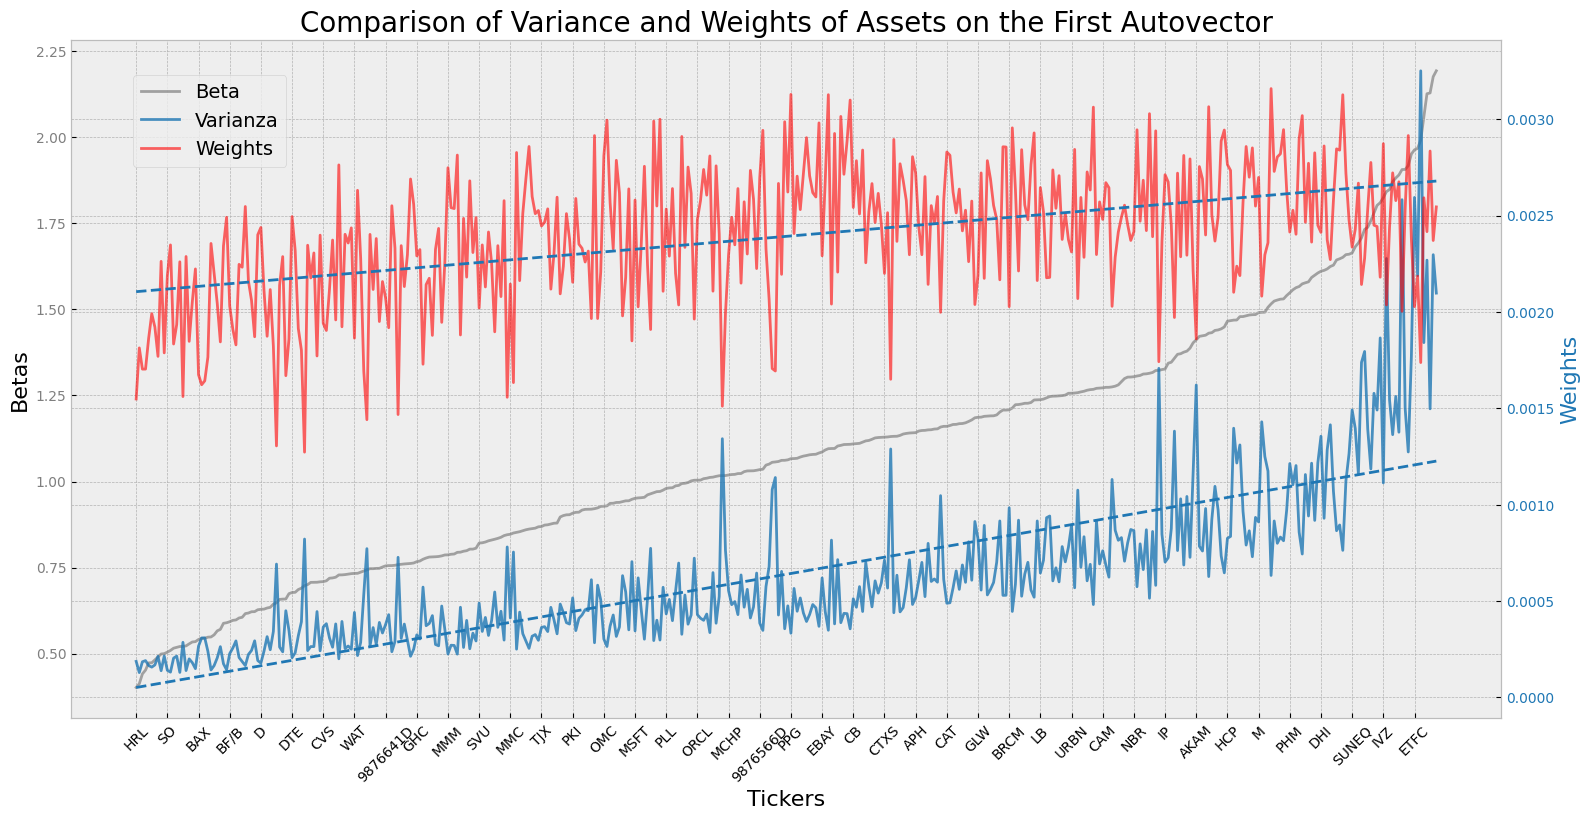

In [21]:
plt.style.use('bmh')  # Usando un estilo limpio y profesional

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Graficar la primera columna 'Varianza' en el eje y primario
color = 'tab:grey'
ax1.set_ylabel('Betas', color='black', fontsize=16)  # we already handled the x-label with ax1
ax1.set_xlabel('Tickers', color='black', fontsize=16)  # we already handled the x-label with ax1
ax1.plot(betas_ordenadas_df.index, betas_ordenadas_df['Beta'], color=color, alpha=0.7, label='Beta')

#ax1.plot(betas_ordenadas_df.index, y_tendencia, color=color, linestyle='--')  # Línea de tendencia

ax1.tick_params(axis='y', labelcolor=color)
tickers = betas_ordenadas_df.index.tolist()


# Establecer los xticks para que solo se muestre uno de cada 10
ax1.set_xticks(np.arange(0, len(tickers), 10))  # Establece las posiciones de los xticks cada 10 índices
ax1.set_xticklabels(tickers[::10], rotation=45)  # Establece las etiquetas de los xticks con una rotación de 45 grados



# Crear un segundo eje y que comparte el mismo eje x
ax2 = ax1.twinx()  # Instante de un segundo eje que comparte el eje x
color = 'tab:blue'
ax2.set_ylabel('Variance', color=color, fontsize=16)  # we already handled the x-label with ax1

# Graficar la segunda columna 'Varianza' en el eje y secundario
ax2.plot(betas_ordenadas_df.index, betas_ordenadas_df['Varianza'], color=color, alpha=0.8, label='Varianza')
ax2.plot(betas_ordenadas_df.index, y_tendencia_var, color=color, linestyle='--')  # Línea de tendencia
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Weights', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(betas_ordenadas_df.index, betas_ordenadas_df['Peso'], color='red', alpha=0.6, label='Weights')
ax2.plot(betas_ordenadas_df.index, y_tendencia_pesos, color=color, linestyle='--')  # Línea de tendencia


# Extraer handles y labels de ambos ejes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combinar handles y labels
handles = handles1 + handles2
labels = labels1 + labels2

# Crear una leyenda combinada
fig.legend(handles, labels, loc='upper left', fontsize=14, bbox_to_anchor=(0.08, 0.95))

# Título y ajustes finales
fig.tight_layout()  # Para asegurarse de que no hay solapamiento en la visualización
plt.title('Comparison of Variance and Weights of Assets on the First Autovector', fontsize=20)

# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/pesos-variance.pdf', format='pdf', dpi=300)

plt.show()

In [22]:
pesos_primer_ord_df = pesos_primer_df.sort_values(by='Peso', ascending=False)

pesos_segundo = autovectores[1]/np.sum(autovectores[1])
pesos_segundo_df = pd.DataFrame(pesos_segundo, index=tickers, columns=['Peso'])
pesos_segundo_ord_df = pesos_segundo_df.sort_values(by='Peso', ascending=False)

pesos_tercer = autovectores[2]/np.sum(autovectores[2])
pesos_tercer_df = pd.DataFrame(pesos_tercer, index=tickers, columns=['Peso'])
pesos_tercer_ord_df = pesos_tercer_df.sort_values(by='Peso', ascending=False)

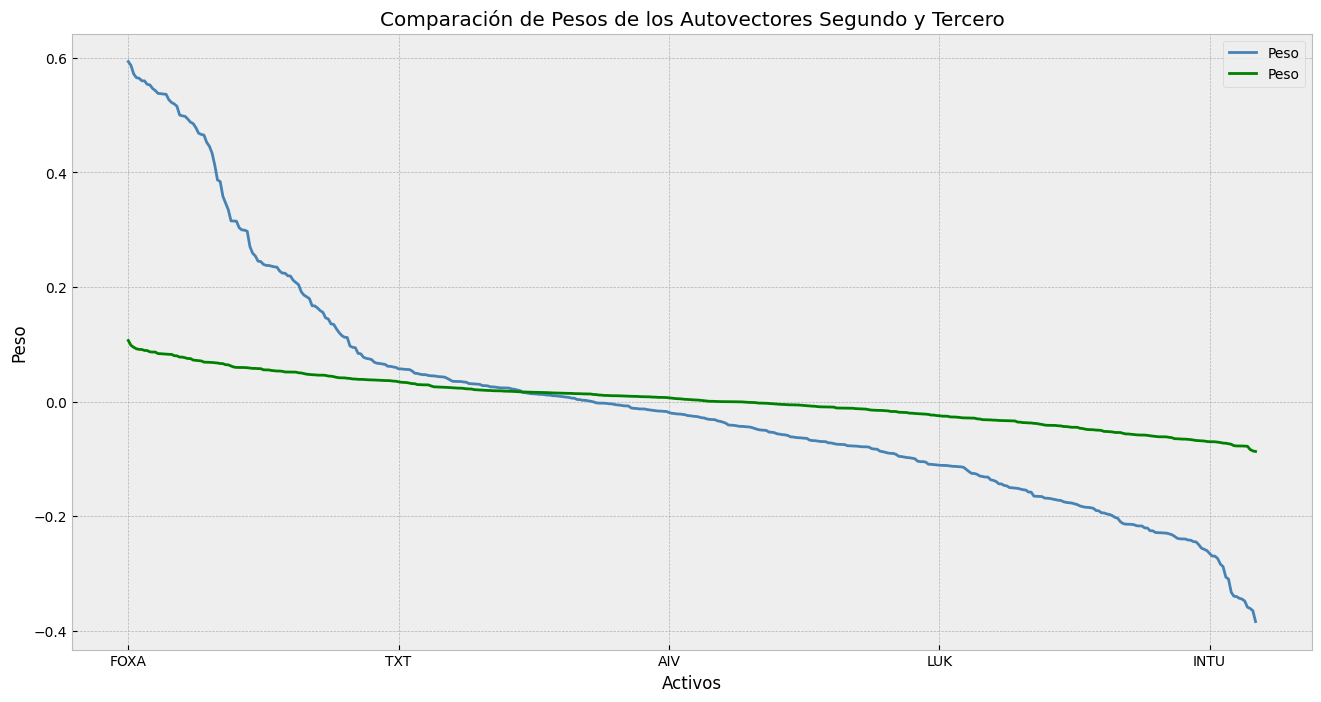

In [23]:
# Crear una figura y un solo eje
fig, ax = plt.subplots(figsize=(16, 8))

# Gráfico para el DataFrame pesos_segundo_ord_df en el mismo eje
pesos_segundo_ord_df.plot(ax=ax, color='steelblue', legend=True, label='Segundo Autovector')

# Gráfico para el DataFrame pesos_tercer_ord_df en el mismo eje
pesos_tercer_ord_df.plot(ax=ax, color='green', legend=True, label='Tercer Autovector')

# Configurar títulos y etiquetas
ax.set_title('Comparación de Pesos de los Autovectores Segundo y Tercero')
ax.set_ylabel('Peso')
ax.set_xlabel('Activos')

# Mostrar la leyenda
ax.legend()

# Mostrar la figura
plt.show()



In [24]:
pesos_segundo_ord_df[pesos_segundo_ord_df['Peso'] > 0.6].index

Index([], dtype='object')

In [25]:
tickers_10 = pesos_segundo_ord_df[pesos_segundo_ord_df['Peso'] > 0.6].index
# Diccionario para almacenar la industria de cada ticker
industries = {}

# Obtener la información de cada ticker
for ticker in tickers_10:
    stock = yf.Ticker(ticker)
    industry = stock.info.get('industry', 'No disponible')
    industries[ticker] = industry

# Crear un DataFrame con los resultados
df_industries = pd.DataFrame(list(industries.items()), columns=['Ticker', 'Industry'])


In [26]:
pesos_primer = autovectores[0]/np.sum(autovectores[0])

ret_cartera_train = pesos_primer @ ret_sp500_norm_train.T

ret_cartera_train_segundo = pesos_segundo @ ret_sp500_norm_train.T

ret_cartera_train_tercer = pesos_tercer @ ret_sp500_norm_train.T

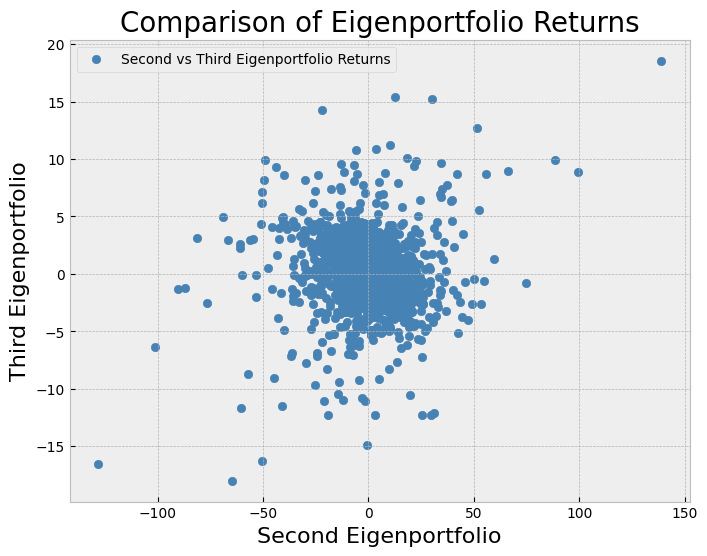

In [46]:
figure = plt.figure(figsize=(8, 6))
plt.style.use('bmh')  # Usando un estilo limpio y profesional
plt.scatter(ret_cartera_train_segundo, ret_cartera_train_tercer, color='steelblue', label='Second vs Third Eigenportfolio Returns')
plt.xlabel('Second Eigenportfolio', fontsize=16)
plt.ylabel('Third Eigenportfolio', fontsize=16)
plt.title('Comparison of Eigenportfolio Returns', fontsize=20)
plt.legend()
plt.grid(True)
fig.tight_layout()  # Para asegurarse de que no hay solapamiento en la visualización
# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/scatter.pdf', format='pdf', dpi=300)
plt.show()

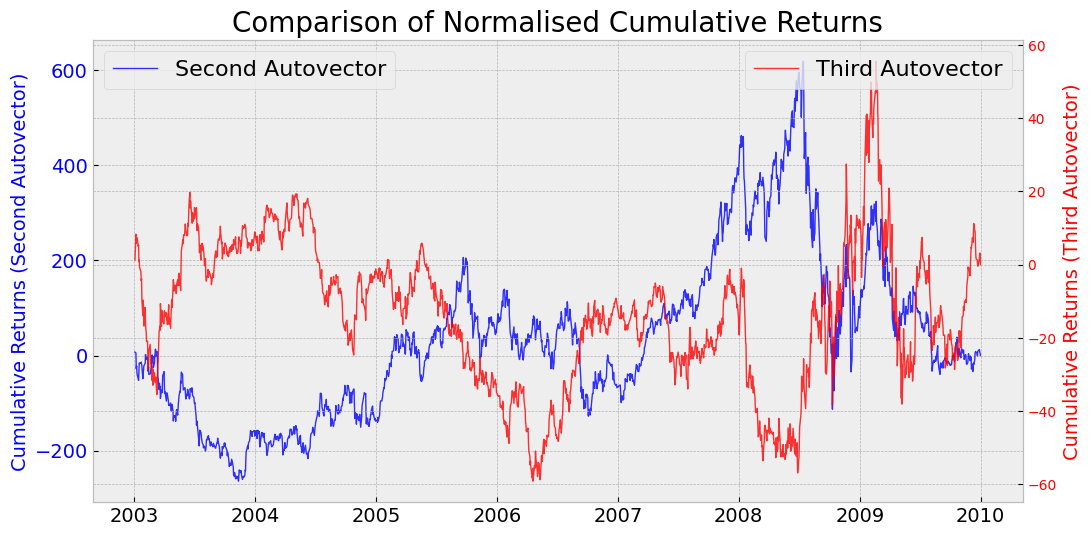

In [30]:
plt.style.use('bmh')  # Usando un estilo limpio y profesional

import matplotlib.pyplot as plt

plt.style.use('bmh')  # Usando un estilo limpio y profesional

fig, ax1 = plt.subplots(figsize=(12, 6))  # Tamaño adecuado para inclusión en documentos

# Gráfico de la suma acumulada de retornos de la primera cartera
# ax1.plot(ret_cartera_train.cumsum(), label='Second Autovector', linewidth=2, color='b')

# ax1.plot(ret_cartera_train.cumsum().rolling(200).mean(), linestyle='--', linewidth=1, alpha=0.8, color='b')
ax1.set_ylabel('Cumulative Returns (Second Autovector)', fontsize=14, color='b')  # Etiqueta para el eje Y
ax1.tick_params(axis='y', labelcolor='b')  # Color del eje y

# Gráfico de la suma acumulada de retornos de la segunda cartera (índice normalizado)
ax1.plot(ret_cartera_train_segundo.cumsum(), label='Second Autovector', linewidth=1, alpha=0.8, color='b')
#ax1.plot(ret_cartera_train_segundo.cumsum().rolling(200).mean(), linestyle='--', linewidth=1, alpha=0.8, color='b')

# Crear un segundo eje y
ax2 = ax1.twinx()



ax2.set_ylabel('Cumulative Returns (Third Autovector)', fontsize=16, color='r')  # Etiqueta para el segundo eje Y
ax2.tick_params(axis='y', labelcolor='r')  # Color del eje y

ax2.plot(ret_cartera_train_tercer.cumsum(), label='Third Autovector', linewidth=1, alpha=0.8, color='r')
#ax2.plot(ret_cartera_train_tercer.cumsum().rolling(200).mean(), linestyle='--', linewidth=1, alpha=0.8, color='r')

ax2.set_ylabel('Cumulative Returns (Third Autovector)', fontsize=14, color='r')  # Etiqueta para el segundo eje Y
ax2.tick_params(axis='y', labelcolor='r')  # Color del eje y

ax1.set_title('Comparison of Normalised Cumulative Returns', fontsize=20)  # Título descriptivo

ax1.legend(loc='upper left', fontsize=16)  # Leyenda para el primer eje y
ax2.legend(loc='upper right', fontsize=16)  # Leyenda para el segundo eje y

ax1.tick_params(labelsize=14)  # Ajustar tamaño de fuente para las etiquetas de los ticks

plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Guardar la figura en formato PDF para mejor calidad en LaTeX
plt.savefig('/workspace/imgs/retornos_acumulados.pdf', format='pdf', dpi=300)

plt.show()
